In [1]:
def print_tree(tree, level=0, label='.'):
    print(' ' * (level*2)+ label + ':', tree.val)
    for child, lbl in zip([tree.left, tree.right], ['L', 'R']): # do for all children
        if child is not None:
            print_tree(child, level+1, lbl)

In [2]:
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None: return 'Nothing in the tree !'
    def add_nodes_edges(tree, dot=None):
        #create Digraph object
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name = str(tree), label=str(tree.val))
            
        for child in [tree.left, tree.right]: # do for all children
            if child is not None:
                if child == tree.left: dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right: dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.val))
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot) # recursive call
                    
        return dot
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)
        
    # visualize the graph
    display(dot)

# Binary Search Tree

In [3]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [4]:
class BST(TreeNode):
    def __init__(self, val, parent = None):
        super().__init__(val)
        self.parent = parent
        
    def insert(self, val):
        if val < self.val: # insert into left
            if self.left is None:
                new_node = BST(val, parent = self)
                self.left = new_node
            else:
                self.left.insert(val)
                
        else: # greater
            if self.right is None:
                self.right = BST(val, parent=self)
            else:
                self.right.insert(val)
    
    def search(self, val):
        if val < self.val:
            if self.left is None:
                return str(val) + " Not found"
            return self.left.findval(val)
        elif val > self.val:
            if self.right is None:
                return str(val) + " Not found"
            return self.right.findval(val)
        else:
            return str(self.val) + ' is found'
            
    
    
    def dfs_inorder(self):
        if self.left:
            self.left.dfs_inorder()
    
        print(self.val)
    
        if self.right:
            self.right.dfs_inorder()

In [5]:
b = BST(20)
print(b.val)

20


In [6]:
print_tree(b)

.: 20


In [7]:
b.insert(24)
print_tree(b)

.: 20
  R: 24


In [8]:
b.insert(10)
print_tree(b)

.: 20
  L: 10
  R: 24


In [9]:
b.insert(1)
print_tree(b)

.: 20
  L: 10
    L: 1
  R: 24


In [10]:
b.dfs_inorder() # get sorted value

1
10
20
24


In [11]:
b.insert(21)
b.insert(26)
b.insert(25)

In [12]:
print_tree(b)

.: 20
  L: 10
    L: 1
  R: 24
    L: 21
    R: 26
      L: 25


# Deletion from the BST

First, we'll need some helper functions. Let's discuss those first.

In [13]:
def find_root(self):
    """Find the absolute root of the BST to which self belongs.
    Keep going up until you reach no-parent node."""
    temp = self
    while temp.parent is not None:
        temp = temp.parent
        
    return temp
    # keep going up until no parent..return that.

BST.find_root = find_root

In [14]:
def find_min(self):
    """Find the minimum value starting from self. In BST, this is simple, keep going left until no more left is left!"""
    
    min_node = self
    
    if self.left is not None:
        min_node = self.left.find_min()
    
    return min_node

BST.find_min = find_min

In [15]:
print_tree(b)
print("Min is: ", b.find_min().val)

.: 20
  L: 10
    L: 1
  R: 24
    L: 21
    R: 26
      L: 25
Min is:  1


In [17]:
def set_for_parent(self, new_ref):
    """Disconnect self from parent and attach new_ref to parent is self's place."""
    
    if self.parent is None: return
    
    if self.parent.right == self:
        self.parent.right = new_ref
        
    if self.parent.left == self:
        self.parent.left = new_ref
    
BST.set_for_parent = set_for_parent

In [18]:
def replace_with_node(self, node):
    """Replace self with node (which is a child). Make sure to fix the parent of the node and parent' pointing to node. Assume we have no children other than node."""
    
    self.set_for_parent(node) # connect new node to parent on poper location
    node.parent = self.parent # set node's parent correctly
    self.parent = None        # Disconnect self from the parent
    return node.find_root()   # find root again

BST.replace_with_node = replace_with_node

In [36]:
def delete(self, val):
    # first.. if we are alone, on the root and no children plus the values matches just return None
    
    if self.parent is None and self.right is None and self.left is None and self.val == val:
        return None
    
    # we are the node to be deleted
    if self.val == val:
        # check if we are leaf
        if self.right is None and self.left is None:
            self.set_for_parent(None) # set in place of self a None
            return self.find_root()
        
        #  check if we have just a left node
        if self.right is None:
            return self.replace_with_node(self.left)
        
        # check if we have just a right node
        if self.left is None:
            return self.replace_with_node(self.right)
        
        # now we have both children. Find the successor and replace "self" with it.
        # (our succ is definitely in our right child and it can't have two children because left child will always be smaller.)
        
        successor = self.right.find_min()
        
        # copy successor's val here
        self.val = successor.val
        
        return self.right.delete(successor.val)
        # ^ delete the successor node, which is in our right child BST.
        # ^ IT's guaranteed that it's the simpler case since successor CANNOT have a left child.
    
    # we were not the node to be deleted, go children
    if val < self.val:
        if self.left is not None:
            return self.left.delete(val)
        else:
            return self.find_root() # nothing to delete
    else:
        if self.right is not None:
            return self.right.delete(val)
        else:
            return self.find_root()
            
BST.delete = delete

In [37]:
b = BST(20)
b.insert(24)
b.insert(21)
b.insert(10)
b.insert(25)
b.insert(26)

print_tree(b)

.: 20
  L: 10
  R: 24
    L: 21
    R: 25
      R: 26


In [38]:
b = b.delete(20)

In [39]:
print_tree(b)
#visualize_tree(b)

.: 21
  L: 10
  R: 24
    R: 25
      R: 26


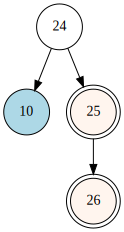

In [40]:
b = b.delete(21)
visualize_tree(b)

In [41]:
b = BST(5)

b.insert(1)
b.insert(20)
b.insert(10)
b.insert(50)
b.insert(30)
b.insert(40)
b.insert(60)

print_tree(b)
#visualize_tree(b)

.: 5
  L: 1
  R: 20
    L: 10
    R: 50
      L: 30
        R: 40
      R: 60


In [42]:
b = b.delete(1)

In [43]:
print_tree(b)
#visualize_tree(b)

.: 5
  R: 20
    L: 10
    R: 50
      L: 30
        R: 40
      R: 60


# Getting Sorted Values Back

In [44]:
l = [1, 2, 17, 9, 13, 21, 5, 71, 6, 8]

In [45]:
b = BST(l[0])
for i in l[1:]:
    b.insert(i)

In [46]:
print_tree(b)
#visualize_tree(b)

.: 1
  R: 2
    R: 17
      L: 9
        L: 5
          R: 6
            R: 8
        R: 13
      R: 21
        R: 71


In [47]:
b.dfs_inorder()

1
2
5
6
8
9
13
17
21
71


# Issue with BST - Balance

In [48]:
l = [1, 2, 4, 9, 13, 21, 51, 71, 82]   # ,6]

In [49]:
b = BST(l[0])
for i in l[1:]:
    b.insert(i)

In [50]:
print_tree(b)
#visualize_tree(b)

.: 1
  R: 2
    R: 4
      R: 9
        R: 13
          R: 21
            R: 51
              R: 71
                R: 82


In [51]:
b.dfs_inorder()

1
2
4
9
13
21
51
71
82


This issue is resolved using advanced BSTs such as RB trees and AVL tree. Balance is achieved using the concept of rotation based on different rules.